In [1]:
import trecs
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
from chaney_utils import (
    load_sim_results,
    merge_results,
    graph_relative_to_ideal
)
import warnings
warnings.simplefilter("ignore")

In [2]:
DEBUG = True # don't save figures

# Experimental simulations run on cluster

In [3]:
# graphing
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})

# readable legend keys
id_to_readable = {
    "ideal": "ideal", 
    "content_chaney": "content filtering",
    "mf" : "matrix factorization",
    "sf": "social filtering",
    "popularity": "popularity", 
    "random": "random"
}

## Repeated training, change in jaccard index (similar users paired)

In [4]:
# replace with the experimental output directory in your experiment!
results = merge_results([
    "exps/replication/repeated/batch_1",
    "exps/replication/repeated/batch_2",
    "exps/replication/repeated/batch_3", 
    "exps/replication/repeated/batch_4"
])

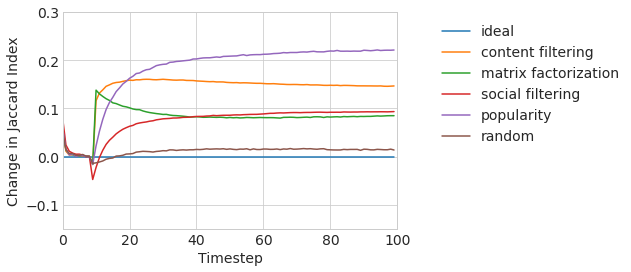

In [5]:
model_keys = ["ideal", "content_chaney", "mf", "sf", "popularity", "random"]
graph_relative_to_ideal(results, "sim_users", model_keys, id_to_readable, absolute_measure=False)
plt.ylabel("Change in Jaccard Index")
plt.xlabel("Timestep")
plt.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1.7, 1.0))
plt.ylim(-0.15, 0.3)
plt.xlim(0, 100)
if not DEBUG:
    plt.savefig("figures/repeated_training_sim_pair.pdf", bbox_inches = "tight")

## Single training, change in jaccard index (similar users paired)

In [8]:
## replace with the experimental output directory in your experiment!
results = merge_results([
    "exps/replication/bugfix_test/single/batch_1", 
    "exps/replication/bugfix_test/single/batch_2", 
    "exps/replication/bugfix_test/single/batch_3", 
    "exps/replication/bugfix_test/single/batch_4"
])

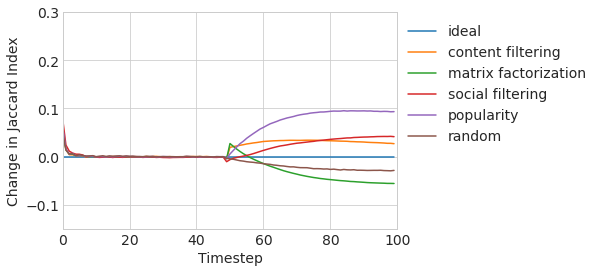

In [9]:
model_keys = ["ideal", "content_chaney", "mf", "sf", "popularity", "random"]
graph_relative_to_ideal(results, "sim_users", model_keys, id_to_readable, absolute_measure=False, mult_sd=0.0)
plt.ylabel("Change in Jaccard Index")
plt.xlabel("Timestep")
plt.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.ylim(-0.15, 0.3)
plt.xlim(0, 100)
if not DEBUG:
    plt.savefig("figures/single_training_sim_pair.pdf", bbox_inches = "tight")